In [67]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [165]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline
import math
from google.colab.patches import cv2_imshow

#1. Text Problem

In [166]:
#import the image
#cv2.imread assumes the images in bgr format so if we see wierd colors, chnage it to rgb
img=cv2.imread('/content/gdrive/MyDrive/DPCV_images/task_1_img.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

the grid size for following num_grids: 5.0,3.0


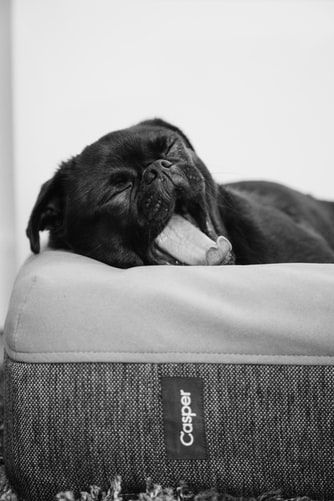

In [268]:
#image dimension = (501,334)
def pixelate(img,num_grids):
  '''Dividing the image into grids can be done in many ways but the optimal way(i felt) to get the matrix size is by having good equal square portions
  (for this image)
 so I took the square root of grid and got the nearest number to it as column number'''

 #getting the optimal  dimensions for the grid
  rows,cols=gray_img.shape
  grid_cols=math.sqrt(num_grids)//1
  if (num_grids/grid_cols).is_integer():
    grid_rows=num_grids//grid_cols
  else:
    grid_rows=num_grids//grid_cols+1
  split_images=[]
  img_num=1
  print(f'the grid size for following num_grids: {grid_rows},{grid_cols}')
  '''there are 3 cases which we need to consider otherwise we might lose some pixels 
  case 1: where both dimesnsions are restricted
  case2: row is restricted but column what ever is left that is taken (at end grid of every row)
  case3: column is restricted '''
  for i in range(int(grid_rows)):
    for j in range(int(grid_cols)):
      if img_num<num_grids:
        if j!=grid_cols-1 and i !=grid_rows-1: #case1
          img_num+=1
          #setting slicing indices for each image in grid
          strt_row=int((rows*i)//grid_rows)
          end_row=int((rows*(i+1))//grid_rows)
          strt_col=int((cols*j)//grid_cols)
          end_col=int((cols*(j+1))//grid_cols)

          #adding the all the sliced images to a list
          split_images.append(img[strt_row:end_row,strt_col:end_col])
        elif j==grid_cols-1: #case2
          # if image is the corner one then we intend to take all the pixel
          img_num+=1
          strt_row=int((rows*i)//grid_rows)
          end_row=int((rows*(i+1))//grid_rows)
          strt_col=int((cols*j)//grid_cols)

          split_images.append(img[strt_row:end_row,strt_col:])

        elif i==grid_rows-1 : #case 3
          img_num+=1
          strt_row=int((rows*i)//grid_rows)
          strt_col=int((cols*j)//grid_cols)
          end_col=int((cols*(j+1))//grid_cols)

          split_images.append(img[strt_row:,strt_col:end_col])
      # if it is the last grid then we take whatever pixels are left with us
      elif img_num==num_grids:
         img_num+=1
         strt_row=int((rows*i)//grid_rows)
         end_row=int((rows*(i+1))//grid_rows)
         strt_col=int((cols*j)//grid_cols)
         split_images.append(img[strt_row:end_row,strt_col:])

      
      # computing average
  
  
  
  grid_averages={}
  for grid_num in range(num_grids):
      grid_averages[f'grid_no:{grid_num+1}']=np.average(split_images[grid_num])
  
  #stitching the image
  b=split_images
  each_col=[]
  for i in range(int(grid_cols)):
    temp_img=[]
    comp_ful=int(grid_cols)*int(grid_rows-1)
    for j in range(comp_ful):
      if j%grid_cols==i:
        temp_img.append(b[j])
    each_col.append(cv2.vconcat(temp_img))

  left_images=num_grids-comp_ful
  last_row=[]
  for img in range(left_images):
      last_row.append(b[comp_ful+img])


  part2=cv2.hconcat(last_row)
  part1=cv2.hconcat(each_col)

  final_stitched_img=cv2.vconcat([part1,part2]) 
  
  return grid_averages,final_stitched_img

   
# since we found the averages our next step is to stich the image back
averages,images=pixelate(gray_img,13)
cv2_imshow(images)

#2. Text Problem

In [264]:
import json
def load_words():
  with open('/content/gdrive/MyDrive/words_dictionary.txt') as json_file:
    valid_words=json.load(json_file)
  return valid_words

v=load_words()
corpus=[i for i in dict(v).keys()]

patterns=["ai", "edu", "org", "tech", "design"]
def billion_dollar_company(corpus,patterns):
  company_names=[]
  for word in corpus:
    for pat in patterns:
      if word.endswith(pat):
        company_names.append(word[:-len(pat)]+'.'+pat)
  print(company_names)
billion_dollar_company(corpus,[patterns[4]])
  

['co.design', '.design', 'fore.design', 'pre.design', 're.design', 'un.design']
